In [2]:
!pip install river scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 34.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.25.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


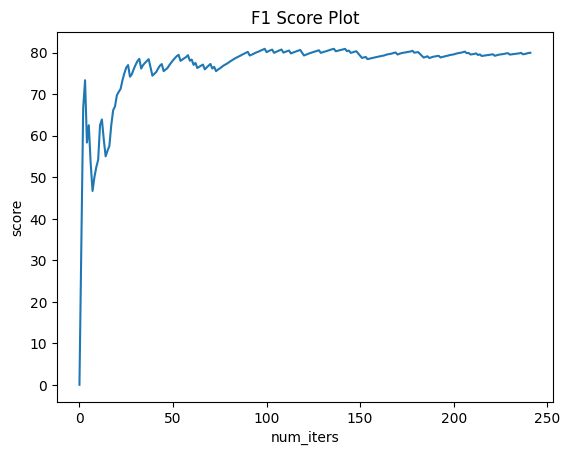

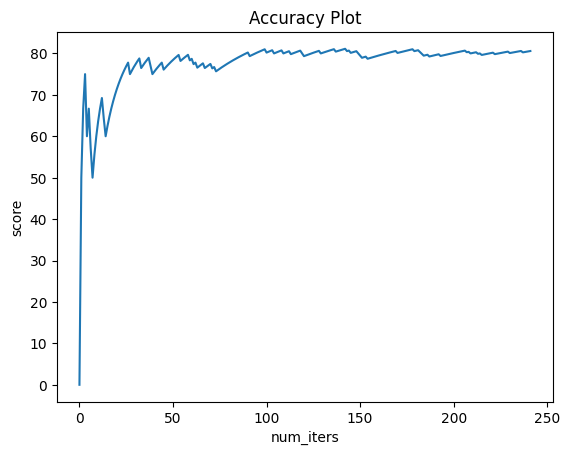

[30] Accuracy: 80.00%
[60] Accuracy: 83.33%
[90] Accuracy: 85.56%
[120] Accuracy: 85.83%
[150] Accuracy: 85.33%
[180] Accuracy: 85.00%
[210] Accuracy: 83.81%
[240] Accuracy: 83.75%
[242] Accuracy: 83.88%


Accuracy: 83.88%

In [57]:
from sklearn import datasets
from river import stream
from river import compose
from river import linear_model
from river import optim
from river import preprocessing
from river import metrics
from river import evaluate
import pandas
import seaborn as sns
import matplotlib.pyplot as plt


dataset_path = '/content/drive/My Drive/Dataset/heart_80.csv'

df = pandas.read_csv(dataset_path)
#print(df)

y = df["output"]
X = df.drop("output", axis=1)

for xi, yi in stream.iter_pandas(X, y):
  #print(xi)
  #print(yi)
  break

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression()
    )


#metric = metrics.Accuracy()

def train(X, y):
    #pipeline = get_pipeline()

    # Initialize metrics

    f1_score = metrics.MacroF1()
    cm = metrics.ConfusionMatrix()
    accuracy = metrics.Accuracy()
    f1_scores = []
    accuracies = []

    # Iterate over the dataset
    for xi, yi in stream.iter_pandas(X, y, shuffle=True, seed=1):
        # Predict the new sample
        yi_pred = model.predict_one(xi)

        # Get the score
        if yi_pred is not None:
            f1_score.update(yi, yi_pred)
            f1_scores.append(f1_score.get() * 100)

            cm.update(yi, yi_pred)

            accuracy.update(yi, yi_pred)  # update the accuracy
            accuracies.append(accuracy.get() * 100)

        # Train the model with the new sample
        model.learn_one(xi, yi)
    #print(accuracy)
    return accuracies, f1_scores, cm, model




def plot(scores: list, text):
    #plt.figure(figsize=(8, 6), dpi=80)
    iters = range(len(scores))
    ax = sns.lineplot(x=iters, y=scores)
    ax.set(xlabel="num_iters", ylabel="score")
    # displaying the title
    plt.title(text)
    plt.show()

F1_score_Plot = "F1 Score Plot"
Accuracy_Plot = "Accuracy Plot"

accuracies, f1_scores, cm, pipeline = train(X, y)

plot(f1_scores, F1_score_Plot)
plot(accuracies, Accuracy_Plot)

#print(accuracy)



metric = metrics.Accuracy()

evaluate.progressive_val_score(
    dataset=stream.iter_pandas(X, y, shuffle=True, seed=1),
    model=pipeline,
    metric=metric,
    print_every=30,
)

#metric
#cm
#metric = metrics.ROCAUC()
#metric